# Explorando datos con Python - datos del mundo real

La última vez, observamos las calificaciones de los datos de nuestros estudiantes e investigamos esto visualmente con histogramas y diagramas de caja. Ahora analizaremos casos más complejos, describiremos los datos con más detalle y discutiremos hacer comparaciones básicas entre datos.

## Distibuciones de datos del mundo real

La última vez, observamos las calificaciones de los datos de nuestros estudiantes y etimamos a partir de esta muestra cómo sería la población total de calificaciones. solo para acutlizar, echemos un vistazo a estos datos nuevamente. 

Ejecute el código a contiuación para imprimir los datos y hacer un histograma + diagrama de caja que muestre las calificaciones de nuestra muestra de estudiantes.


         Name  StudyHours  Grade   Pass
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
5       Vicky        1.00    3.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.50   26.0  False
9    Giovanni       14.50   74.0   True
10  Francesca       15.50   82.0   True
11      Rajab       13.75   62.0   True
12    Naiyana        9.00   37.0  False
13       Kian        8.00   15.0  False
14      Jenny       15.50   70.0   True
15     Jakeem        8.00   27.0  False
16     Helena        9.00   36.0  False
17      Ismat        6.00   35.0  False
18      Anila       10.00   48.0  False
19       Skye       12.00   52.0  False
20     Daniel       12.50   63.0   True
21      Aisha       12.00   64.0   True
Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\HECTO\AppData\Local\Temp\ipykernel_16020\3811869025.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


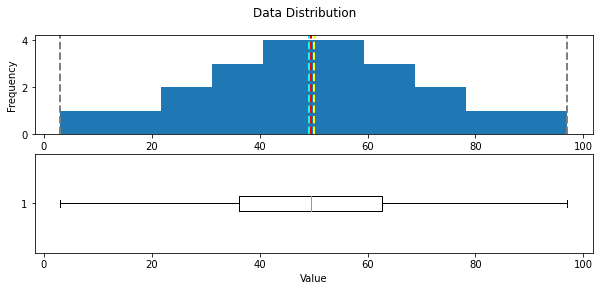

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# Cargar datos desde un arvhivo de texto
url= "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv"
df_students = pd.read_csv(url,delimiter=',',header='infer')

# Eliminamos cualqueier fila con datos faltantes
df_students = df_students.dropna(axis=0, how='any')

# Calcule quién aprobó, asumiendo que '60' es la calificación necesaria par aprobar
passes  = pd.Series(df_students['Grade'] >= 60)

# Guardar quién pasó el marco de datos de Pandas
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)


# Imprimie el resultado en este cuaderno
print(df_students)


# Creamos una función que podamos reutilizar
def show_distribution(var_data):
    '''
    Esta función hará una distribución (gráfico) y lo mostrará
    '''

    # Obtener las medidas de tendencia central
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Crea una figura para 2 subparcelas (2 filas, 1 columna)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Gráficar el histograma   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Agregar líneas para las medidas de tendencia central
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Trazar el diagrama de caja  
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Añadir título de la figura
    fig.suptitle('Data Distribution')

    # Mostrar la figura 
    fig.show()


show_distribution(df_students['Grade'])

Como recordará, nuestros datos tenían la meida y la moda en el centro, con datos distribuidos simétricamente desde allí. 

Ahora echemos un vistazo a la distribución d elos datos de horas de estudio.

Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\HECTO\AppData\Local\Temp\ipykernel_16020\3811869025.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


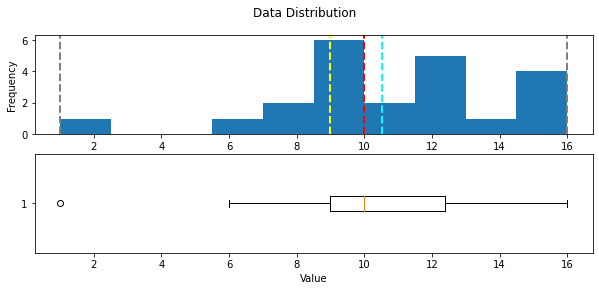

In [2]:
# Otener la variable a examinar
col = df_students['StudyHours']
# Llamamos a la función
show_distribution(col)

La ditribución de los datos de tiempo de estudio es significativamente diferente a la de las calificaciones. 

tenga en cuenta que los bigotes del diagrama de caja solo comienzan al rededor de 6,0, lo que indica que la gran mayoría del primer trimestre de los datos está por encima de este valor. El mínimo está marcado con un **o**, lo que indica que estadísticamente es un *valor atípido*, un valor que se encuentra significativamente fuera del rango del resto de la distribución.

Los valores atípicos pueden ocurrir por muchas razones. Tal vez un estudiante pretendía registrar "10" horas de tiempo de estudio, pero ingresó "1! y se perdió el "O". ¡O tal vez el estudiante era anormalmente perezoso cuando se trataba de estudiar! De cualquier manera, es una anomalía estadística que no representa a un estudiante típico. Veamos cómo se ve la distribución sin él.



Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\HECTO\AppData\Local\Temp\ipykernel_16020\3811869025.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


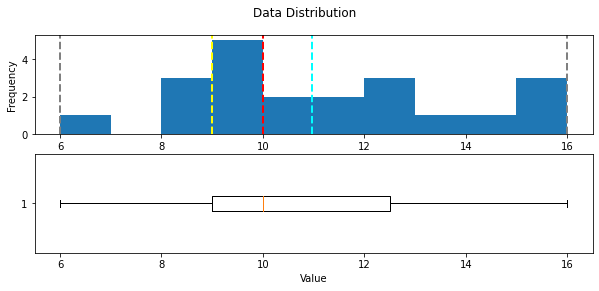

In [3]:
# Obtener la variable a examinar
# Solo recibiremos alumnos que hayan estudiado más de una hora
col = df_students[df_students.StudyHours>1]['StudyHours']

# Llamar a la función
show_distribution(col)

Para fines de aprendizaje, acabamos de tratar el valor **1** como un verdadero valor atípico aquí y lo exluimos. Sin embargo, en el mundo real, sería inusual exluir datos en los estremos sin más justificación cuando el tamaño de nuestra meustra es tan pequeño. }Esto se debe a que cuando más pequeño sea el tamaño de neustra meustra, más probable es que neustra muestra sea una mala representación de toda la población (aquí, la población significa las calificaciones de todos los estudiantes, no solo de nuestros 22). Por ejemplo, si muestreamos el tiempo de estudio de otros 1000 estudiantes, ¡podríamos encontrar que en realidad es bastante común no estudiar mucho!

Cuando tenemos más datos disponibles, nuestra muestra se vuelve más confiable. Esto hace que sea más fácil considerar valores atípicos como valors que cean por debajo o por encima delos percentiles dentro de los cuales se encuentran la mayoría de los datos. Por ejemplo, el siguiente código utiliza la función **cuantil** de Pandas para exluir las observaciones por debajo del percentil 0,01 (el valor por encima del cual reside el 99 % de los datos).

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\HECTO\AppData\Local\Temp\ipykernel_16020\3811869025.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


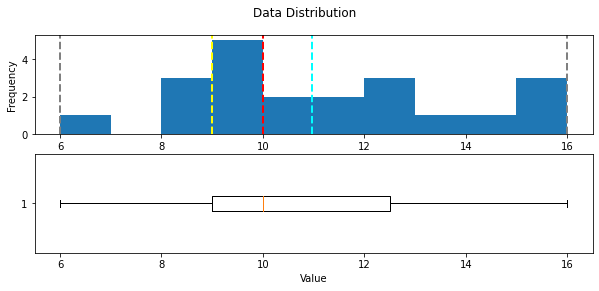

In [4]:
# Calcular el percentil 0.01
q01 = df_students.StudyHours.quantile(0.01)
# Obtener la variable a examinar
col = df_students[df_students.StudyHours>q01]['StudyHours']
# Llamar a la función
show_distribution(col)

> **Sugerencia**: También puede eliminar los valores atípicos en el extremo superior d ela distribución definiendo un umbral en un valor de percentil alto; por ejemplo, podría usar la funcion **quantile** para encontrar el percentil 0,99 por debajo del cual reside el 99% de los datos.

Con los valors atípicos elimados, el diagrama de caja muestra todos los datos dentro de los cuatro cuartiles. Sin embargo, tenga en cuenta que la distribución no es simétrica como lo es para los datos de calificaciones: hay algunos estudiantes con tiempos de estudio muy altos de alrededor de 16 horas, pero la mayor parte de los datos es de entre 7 y 13 horas; Los pocos valores extremandamente altos tiran de la media hacia el extremo superior de la escala.

Veamos la dnsidad de esta distribución.

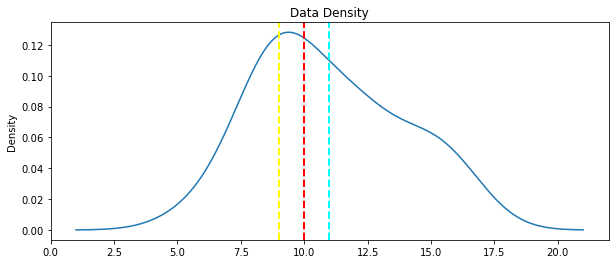

In [5]:
def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    # Trazar la densidad
    var_data.plot.density()

    # Añadir títulos
    plt.title('Data Density')

    # Mostrar las medidas de tendencia central
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Mostrar la figura
    plt.show()

# Obtener la densidad de estudios por hora
show_density(col)

Este tipo de distribución se llama *asimétrica a la derecha*. La masa de los datos está en el lado izquierdo de la distribución, creando una larga cola hacia la derecha debido a los valores enel extremo superior; que tiran d ela media hacia la derecha.

### Medidas de varianza

Así que ahora tenemos una buena idea de dónde está la mitad de las distribuciones de datos de calificaciones y horas de estudio. Sin embargo, hay otro aspecto de la distribuciones que debemos examinar: ¿cuánta variabilidad hay en los datos?

Las estadísticas típicas que miden la variabilidad en los datos incluyen:
- **Rango**: La diferencia entre el máximo y mínimo. No hay una función integrada para esto, pero es fácil de calcular usando las funciones **min** y **max**.
- **Varianza**: El promedio de la diferencia al cuadrado de la media. Puede usar la función **var** incorporada para encontrar esto.
- **Desviación estándar**: La raíz cuadrada de la varianza. Puede usar la función**estándar** incorporada para encontrar esto.


In [7]:
for col_name in ['Grade','StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49


De estas estadísticas, la desviación estándar es generalmente la más útil. Proporciona una medida de la varianza de los datos en la misma escala que los datos mismos (por lo tanto, puntos de calificación para la distribución de calificaciones y horas para la distribución de horas de estudio). Cuando mayor sea la desviación estándar, mayor será la variación al comparar los valores de la distribución;  en otras palabras, los datos estarán más dispersos.

Cuando se trabaja con una distribución *normal*, la desviación estándar funciona con las características particulares de una distribución normal para brindar una visión aún mayor. Ejecute la celda a continuación para ver la relación entre las desviaciones estándar y los datos en la distribución.

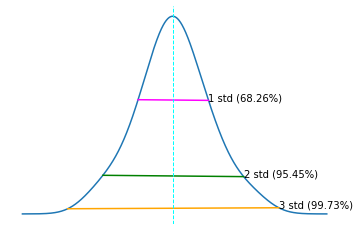

In [8]:
import scipy.stats as stats

# Obtener la columna de calificaciones
col = df_students['Grade']

# Obtener la densidad 
density = stats.gaussian_kde(col)

# Trazar la densidad
col.plot.density()

# Obtener la media y la desviación estándar
s = col.std()
m = col.mean()

# Anotar 1 desviación estándar
x1 = [m-s, m+s]
y1 = density(x1)
plt.plot(x1,y1, color='magenta')
plt.annotate('1 std (68.26%)', (x1[1],y1[1]))

# Anotar 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = density(x2)
plt.plot(x2,y2, color='green')
plt.annotate('2 std (95.45%)', (x2[1],y2[1]))

# Anotar 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = density(x3)
plt.plot(x3,y3, color='orange')
plt.annotate('3 std (99.73%)', (x3[1],y3[1]))

# Mostrar la ubicación de la media
plt.axvline(col.mean(), color='cyan', linestyle='dashed', linewidth=1)

plt.axis('off')

plt.show()

Las líneas horizontales muestran el porcentaje de datos dentreo de 1, 2 y 3 desviación estándar de la media (más o menos).

En cualquier distribución normal:
- Aproximadamente el 68,26% de los valores se encuentran dentro de una desviación estándar de la media.
- Aproximadamente el 95,45% de los valores se encuentran dentro de dos desviaciones estándar de a media.
- Aproximadamente el 99,73% de los valores se encuentran dentro de las tres desviaciones estándar de la media.

Entonces, dado que sabemos que la calificación media es 49.18, la desviación estándar es 21.74 y la distribución de calificaciones es aproximadamente normal; podemos calcular que el 68,26% de los alumnos debería alcanzar una nota entre 27,44 y 70,92.

Las estadísticas descriptivas que hemos usado para comprender la distribución de las variables de datos de los estudiantes son la base del análisis estadístico; y debio a que son una parte tan importante de la exploración de sus datos, hay uyn método. **Describir** incorporado del objeto DataFrame que devuelve las estadísticas descriptivas principales para todas las columnas numéricas.

In [9]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


### Comparando datos

Ahora que sabe algo sobre la distribución estadística de los datos en su cojunto de datos, está listo para examinar sus datos para identificar cualquier relación aparente entre las variables. 

En primer lugar, deshagámonos de las filas que contengan valores atípicos para que tengamos una meustra que sea representativa de una clase típica de estudiantes. Identificamos que la columna StudyHours contiene algunos valores atípicos con valores extremadamente bajos, por lo que eliminaremos esas filas.


In [10]:
df_sample = df_students[df_students['StudyHours']>1]
df_sample

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True
10,Francesca,15.50,82.0,True


### Comparación de variables numéricas y categóricas
Los datos incluyen dos variables numéricas ( **StudyHours** y **Grade** ) y dos variables categóricas ( **Name** y **Pass** ). Comencemos comparando la columna numérica **StudyHours** con la columna categórica **Aprobado** para ver si existe una relación aparente entre la cantidad de horas estudiadas y la calificación aprobatoria.

Para hacer esta comparación, creemos diagramas de caja que muestren la distribución de las Horas de estudio para cada posible valor de Aprobado (verdadero y falso).

<AxesSubplot:title={'center':'StudyHours'}, xlabel='Pass'>

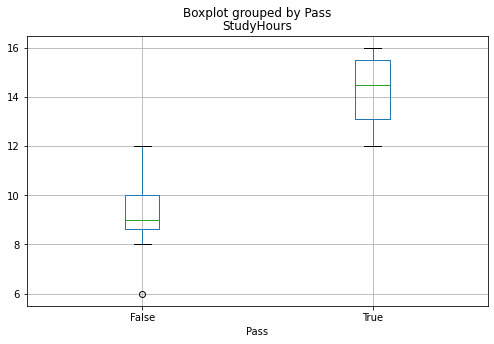

In [11]:
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8,5))

<AxesSubplot:xlabel='Name'>

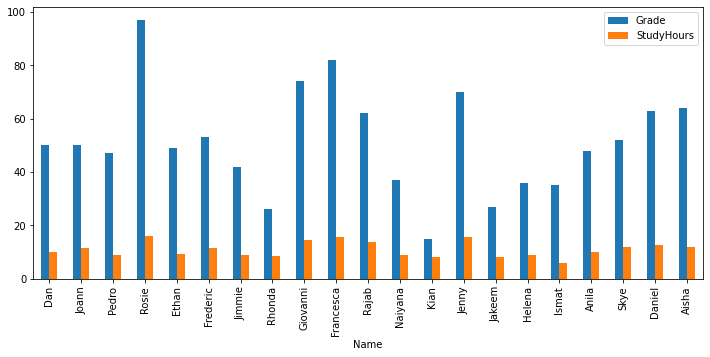

In [18]:
# Crear una barra parcela de nombre vs grado y estudio de horas
df_sample.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(12,5))

El gráfico muestra barras tanto para el grado como para las horas de estudio de cada estudiante; pero no es fácil de comparar porque los valores están en diferentes escalas. Las calificaciones se miden en puntos de calificación y varían de 3 a 97; mientras que el tiempo de estudio se mide en horas y va de 1 a 16.

Una técnica común cuando se trata de datos numéricos en diferentes escalas es normalizar los datos para que los valores conserven su distribución proporcional, pero se midan en la misma escala. Para lograr esto, usaremos una técnica llamada escalado MinMax que distribuye los valores proporcionalmente en una escala de 0 a 1. Podría escribir el código para aplicar esta transformación; pero la biblioteca Scikit-Learn proporciona un escalador para hacerlo por usted.

<AxesSubplot:xlabel='Name'>

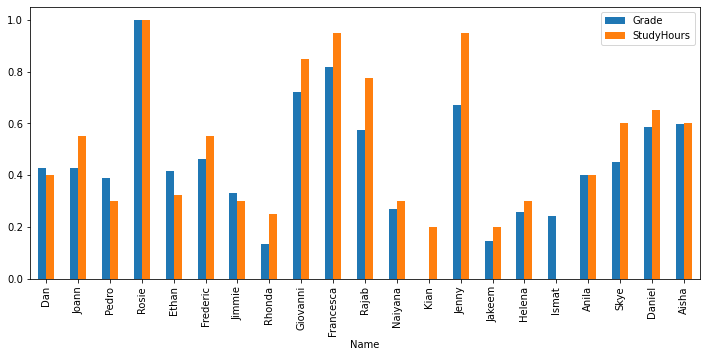

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Obtenemos el objeto escalador
scaler = MinMaxScaler()

# Creamos un nuevo marco de datos para los valores escalados
df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()

# Normalizar las columnas numéricas
df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade','StudyHours']])

# Graficar los valores normalizados
df_normalized.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(12,5))

Con los datos normalizados, es más fácil ver una relación aparente entre la calificación y el tiempo de estudio. No es una coincidencia exacta, pero definitivamente parece que los estudiantes con calificaciones más altas tienden a haber estudiado más.

Entonces parece haber una correlación entre el tiempo de estudio y el grado; y, de hecho, hay una medida de correlación estadística que podemos usar para cuantificar la relación entre estas columnas.

In [15]:
df_normalized.Grade.corr(df_normalized.StudyHours)

0.9117666413789677

La estadística de correlación es un valor entre -1 y 1 que indica la fuerza de una relación. Valores por encima de 0 indican una correlación positiva (valores altos de una variable tienden a coincidir con valores altos de la otra), mientras que valores por debajo de 0 indican una correlación negativa (valores altos de una variable tienden a coincidir con valores bajos de la otra). En este caso, el valor de correlación es cercano a 1; mostrando una fuerte correlación positiva entre el tiempo de estudio y el grado.

>Nota : Los científicos de datos suelen citar la máxima "la correlación no es causalidad ". En otras palabras, por muy tentador que sea, no debe interpretar la correlación estadística como una explicación de por qué uno de los valores es alto. En el caso de los datos de los estudiantes, las estadísticas demuestran que los estudiantes con notas altas tienden a tener también una gran cantidad de tiempo de estudio; pero esto no es lo mismo que demostrar que sacaron buenas notas porque estudiaron mucho. La estadística también podría usarse como evidencia para respaldar la conclusión sin sentido de que los estudiantes estudiaron mucho porque sus calificaciones iban a ser altas.

Otra forma de visualizar la correlación aparente entre dos columnas numéricas es usar un diagrama de *dispersión* .



<AxesSubplot:title={'center':'Study Time vs Grade'}, xlabel='StudyHours', ylabel='Grade'>

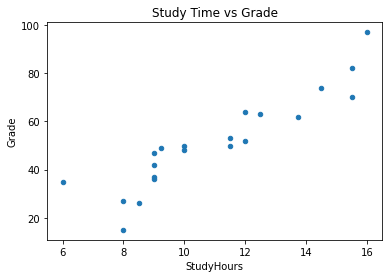

In [21]:
# Crear un gráfico de dispersión
df_sample.plot.scatter(title='Study Time vs Grade', x='StudyHours', y='Grade')

Una vez más, parece que hay un patrón perceptible en el que los estudiantes que estudiaron la mayor caitndad de horas son también los estudiantes que obtivieron las calificaciones más altas.

Podemos ver esto más claramente agregando una línea de *regresión* (o una *línea de mejor ajuste*) a la gráfica que muestra la tendencia general en los datos. Para hacer esto, usaremos una técnica estadística llamada *regresión de mínimos cuadrados*.

> **Advertencia: ¡Matemáticas por delante!**
>
> Recuerda cunado estabas aprendiendo a resolver exuacinoes lineales en la escuela y recuerda que la fomra *pendiente-intersección* de una ecuación lineal se ve así :
> $ y = mx + b $
>
> En esta ecuación, y y x son las variables de coordenadas, m es la pendiente de la línea y b es la intersección y (donde la  línea pasa por el eje Y).En el caso de nuestro diagrama de dispersión para los datos de nuestros estudiantes, ya tenemos nuestros valores para x ( Horario de estudio ) e y ( Calificación ), por lo que solo necesitamos calcular la intersección y la pendiente de la línea recta más cercana a esos puntos. Luego, podemos formar una ecuación lineal que calcule un nuevo valor de y en esa línea para cada uno de nuestros valores de x ( Horarios de estudio ); para evitar confusiones, llamaremos a este nuevo valor de y f(x) (porque es la salida de un valor lineal ecuación función basada en x ). La diferencia entre el y original ( Grado) y el valor de f(x) es el error entre nuestra línea de regresión y la calificación real obtenida por el estudiante. Nuestro objetivo es calcular la pendiente y la intersección de una línea con el error general más bajo.Específicamente, definimos el error general tomando el error de cada punto, elevándolo al cuadrado y sumando todos los errores al cuadrado. La línea de mejor ajuste es la línea que nos da el valor más bajo para la suma de los errores cuadráticos, de ahí el nombre de regresión de mínimos cuadrados.

Afortudadamente, no necesita codificar el cálculo de regresión usted mismo: el paquete **SciPy inluye una clase de estadísticas** que proporciona un método **liregress** para hacer el trabajo duro por usted. Esto devuelve (entre otras cosas) los coeficientes que necesita para la ecuación de la pendiente - pendiente (*m*) **e** intercepción (*b*) en función de un par dado de muestras variables que desea comparar.


slope: 6.3134
y-intercept: -17.9164
so...
 f(x) = 6.3134x + -17.9164


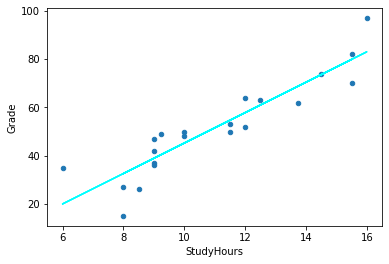

In [22]:
from scipy import stats

#
df_regression = df_sample[['Grade', 'StudyHours']].copy()

# Obtener la pendiente de regresión y el intercepto
m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])
print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m,b))

# Use la función (mx +b) para calcular f(x) para cada valor de x (StudyHours)
df_regression['fx'] = (m * df_regression['StudyHours']) + b

# Use la función (mx +b) para calcular f(x) y el valor real de y (Grado)
df_regression['error'] = df_regression['fx'] - df_regression['Grade']

# Crear un diagrama de dispersión de Grado vs Salario
df_regression.plot.scatter(x='StudyHours', y='Grade')

# Graficar la línea de regresión 
plt.plot(df_regression['StudyHours'],df_regression['fx'], color='cyan')

# Mostrar la trama
plt.show()

Tenga en cuenta que esta vez, el código trazó dos cosas distintas: el gráfico de dispersión de las horas de estudio de muestras y las calificaciones se traza como antes, y luego se traza una línea de mejor ajuste basada en los coeficientes de regresión de mínimos cuadrados. 

Los coeficientes de pendiente e intersección calculados para la línea de regresión se meustran arriba del gráfico.

La línea se basa en los valores *f(x)* calculados para cada valor de **StudyHours**. Ejecute la siguiente celda para ver una tabla que inclulye los siguientes valores:

    - Las horas de estudio de cada estudiante.
    - La **Nota** obtenida por cada estudiante.
    - El valor de ***f(x)*** calculado de **f(x)** y el valor real de **Grado**.
    
Algunos de los errores, particularmente en os extremos, y bastante grandes (hasta más de 17,5 puntos de calificación); por lo general, la línea está bastatnte cerca de las calificaciones reales.


In [23]:
# Mostrar los valores x, y originales, el valor f(x) y el error
df_regression[['StudyHours', 'Grade', 'fx', 'error']]

,StudyHours,Grade,fx,error
0,10.00,50.0,45.217846,-4.782154
1,11.50,50.0,54.687985,4.687985
2,9.00,47.0,38.904421,-8.095579
3,16.00,97.0,83.098400,-13.901600
4,9.25,49.0,40.482777,-8.517223
6,11.50,53.0,54.687985,1.687985
7,9.00,42.0,38.904421,-3.095579
8,8.50,26.0,35.747708,9.747708
9,14.50,74.0,73.628262,-0.371738
10,15.50,82.0,79.941687,-2.058313


## Uso de los coeficientes de regresión para la predicción

Ahora que tiene los coeficientes de regresión para la relación entre el tiempo de estudio y la calificación, puede usarlos en una función para estimas la calificación esperada para una determinada cantidad de estudio.

In [25]:
# Definir una función basada en neustros coeficientes de regresión
def f(x):
    m = 6.3134
    b = -17.9164
    return m*x + b

study_time = 14

# Obtenga f(x) para el tiempo de estudio
prediction = f(study_time)

# La calificación no puede ser inferior a 0 ni superior a 100
expected_grade = max(0,min(100,prediction))

# Imprime la calificación estimada
print ('Estudiar durante {} horas por semana puede resultar en una calificación de  {:.0f}'.format(study_time, expected_grade))

Studying for 14 hours per week may result in a grade of 70


Entonces, al aplicar estadísticas a datos de muestra, ha determinado una relación entre el tiempo de estudio y la calificación; y encapsuló esa relación en una función general que se puede usar para predecir una calificación para una cantidad determinada de tiempo de estudio.

Esta técnica es, de hecho, la premisa básica del aprendizaje automático. Puede tomar un conjunto de datos de muestra que incluye una o más características (en este caso, la cantidad de horas estudiadas) y un valor de etiqueta conocido (en este caso, la calificación obtenida) y usar los datos de muestra para derivar una función que calcula valores de etiqueta predichos para cualquier conjunto dado de características.

## Resumen

Aquí hemos mirado:

Qué es un valor atípico y cómo eliminarlo
Cómo se pueden sesgar los datos
Cómo observar la dispersión de datos
Maneras básicas de comparar variables, como calificaciones y tiempo de estudio
Otras lecturas
Para obtener más información sobre los paquetes de Python que exploró en este cuaderno, consulte la siguiente documentación:

